In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import json
import plotly.graph_objects as go
# Read the CSV file
file_path = r'C:\Users\afontecha\Desktop\PROCURE\Data Analysis\Value Analysis\value_extraction.csv'
df = pd.read_csv(file_path)

# Ensure the 'value' column is numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value'])
display(df)

,Document ID,Value
0,00536200-2023,914091.86
1,00537401-2023,749670.27
2,00538692-2023,42266.28
3,00538851-2023,446865.35
4,00537820-2023,-1.00
...,...,...
1437479,00645609-2022,-1.00
1437480,00644949-2022,1829054.59
1437481,00643560-2022,258782.23
1437482,00645780-2022,-1.00


<Figure size 1000x600 with 0 Axes>

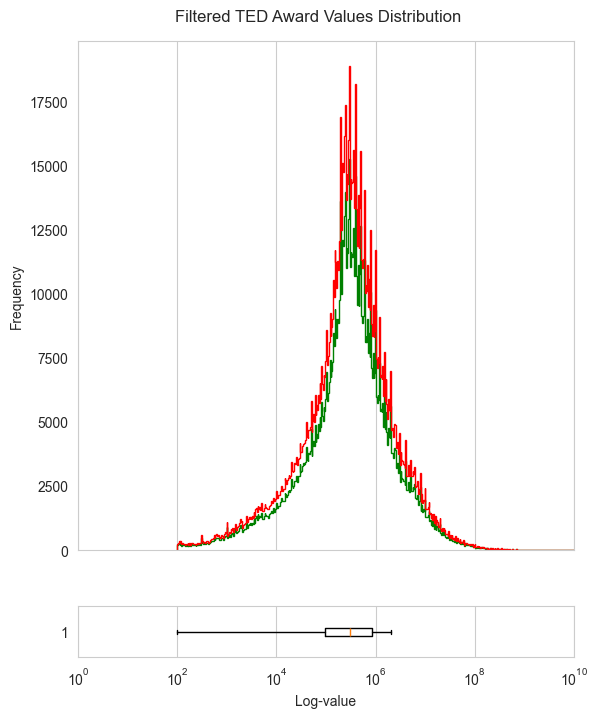

In [6]:

# Set up the plot for the histogram
plt.figure(figsize=(10, 6))

validdata = df[df['Value']>=0]['Value']  # Drop NaN values from the data
nandata=df[df['Value']==-1]['Value']
generated_values = np.random.choice(validdata, size=len(nandata), replace=True)
df_new = df.copy()
df_new.loc[df_new['Value'] == -1, 'Value'] = generated_values

data1 = validdata
data2 = df_new['Value']
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [10, 1]})
bins = np.logspace(np.log10(min(data1)), np.log10(max(data1)), num=500)

ax1.hist(data1, bins=bins, histtype='step', stacked=True, fill=False,color='green')
ax1.hist(data2, bins=bins, histtype='step', stacked=True, fill=False,color='red')


plt.suptitle('Filtered TED Award Values Distribution', y=0.92)
ax1.set_xscale('log')
ax1.set_xlim(1, 10**10)  # Setting x-axis limit
ax1.set_ylabel('Frequency')
ax1.grid(True)  # Show vertical grid lines
ax1.yaxis.grid(False)
fig.set_figheight(8)

ax2.boxplot(data2.values, vert=False, showfliers=False)
ax2.set_xscale('log')
ax2.set_xlim(1, 10**10)  # Setting x-axis limit
ax2.set_xlabel('Log-value')
ax2.grid(True)  # Show vertical grid lines
ax2.yaxis.grid(False)

plt.show()

C:\Users\afontecha\Desktop\BikesForCities\venv\Lib\site-packages\scipy\optimize\_optimize.py:834: RuntimeWarning: invalid value encountered in subtract
  if (np.max(np.ravel(np.abs(sim[1:] - sim[0]))) <= xatol and
C:\Users\afontecha\Desktop\BikesForCities\venv\Lib\site-packages\scipy\optimize\_optimize.py:839: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
C:\Users\afontecha\Desktop\BikesForCities\venv\Lib\site-packages\scipy\optimize\_optimize.py:889: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])
C:\Users\afontecha\Desktop\BikesForCities\venv\Lib\site-packages\numpy\core\function_base.py:139: RuntimeWarning: invalid value encountered in scalar subtract
  delta = stop - start
C:\Users\afontecha\Desktop\BikesForCities\venv\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2027: RuntimeWarning: invalid value encountered in subtract
  x = np.asarray((x - loc)/scale, dtype=dtyp)


2765029.9592189128 44432012.91614419


TypeError: Axes.boxplot() got an unexpected keyword argument 'color'

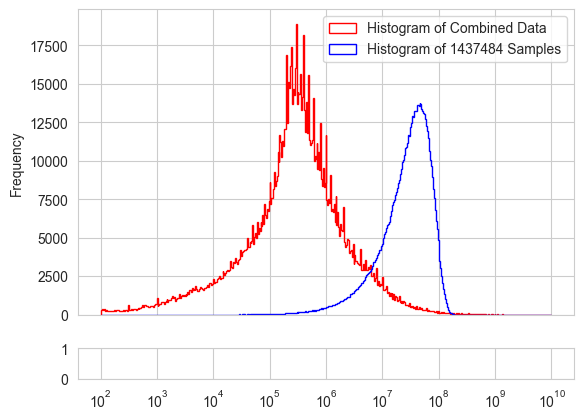

In [49]:
from scipy import stats

data_truncated = data2[data2 > 10**5]  # Apply the threshold

# Define the truncated normal distribution
threshold = 10**5
mu_init, sigma_init = np.mean(data2), np.std(data2)

# Fit the truncated normal distribution
# `a` is the lower bound relative to the mean, and `b` is the upper bound (infinity for one-sided truncation)
a, b = threshold , np.inf  # Truncate at 'a'
params = stats.truncnorm.fit(data_truncated, a, b, loc=mu_init, scale=sigma_init)


# Unpack the fitted parameters
mu_est, sigma_est = params[1], params[2]  # `params` returns shape, loc (mu), and scale (sigma)

# Generate the PDF of the fitted distribution
x = np.linspace(mu_est - 4 * sigma_est, mu_est + 4 * sigma_est, 1000)  # Extend beyond the mean
pdf_fitted = stats.norm.pdf(x, mu_est, sigma_est)

# Generate synthetic data below the threshold using the fitted normal distribution
n_samples = len(data2)  # Number of samples to generate below threshold
mean=np.mean(data2)
std= np.std(data2)
print(mean,std)
synthetic_data = stats.norm.rvs(loc=mean, scale=std, size=n_samples)

# Define bins for the histogram
bins = np.logspace(np.log10(min(data2)), np.log10(max(data2)), num=500)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [10, 1]})

# Histogram of combined data
ax1.hist(data2, bins=bins, histtype='step', stacked=True, fill=False, color='red', label='Histogram of Combined Data')
ax1.hist(synthetic_data, bins=bins, histtype='step', stacked=True, fill=False, color='blue', label=f'Histogram of {n_samples} Samples')

ax1.set_xscale('log')
#ax1.set_xlim(1, 10**10)  # Setting x-axis limit
ax1.set_ylabel('Frequency')
ax1.grid(True)  # Show vertical grid lines
ax1.legend()

# Boxplot for combined data
ax2.boxplot(data2, vert=False, showfliers=False)
ax2.boxplot(synthetic_data, vert=False, showfliers=False)
ax2.set_xscale('log')
#ax2.set_xlim(1, 10**10)  # Setting x-axis limit
ax2.set_xlabel('Log-value')
ax2.grid(True)  # Show vertical grid lines

# Show the overall title
plt.suptitle('Fitted Normal Distribution', y=0.92)
fig.set_figheight(8)
plt.show()

# Print estimated parameters
print(f"Estimated Mean: {mu_est}")
print(f"Estimated Standard Deviation: {sigma_est}")

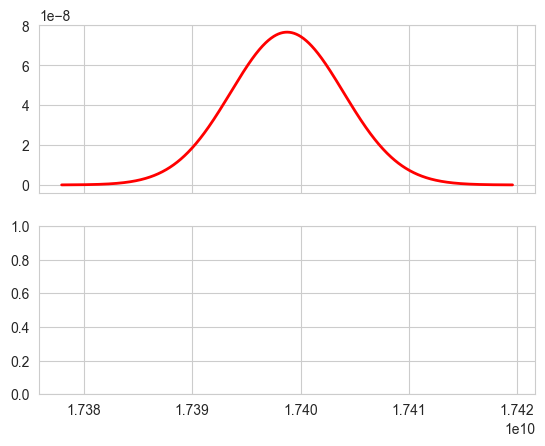

In [31]:

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x,  stats.norm.pdf(x, mu_est, sigma_est), 'r-', lw=2, label='Fitted Normal Distribution')

plt.show()